In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 540

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 7

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 7 /)

data wgt
     &     /7 * .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

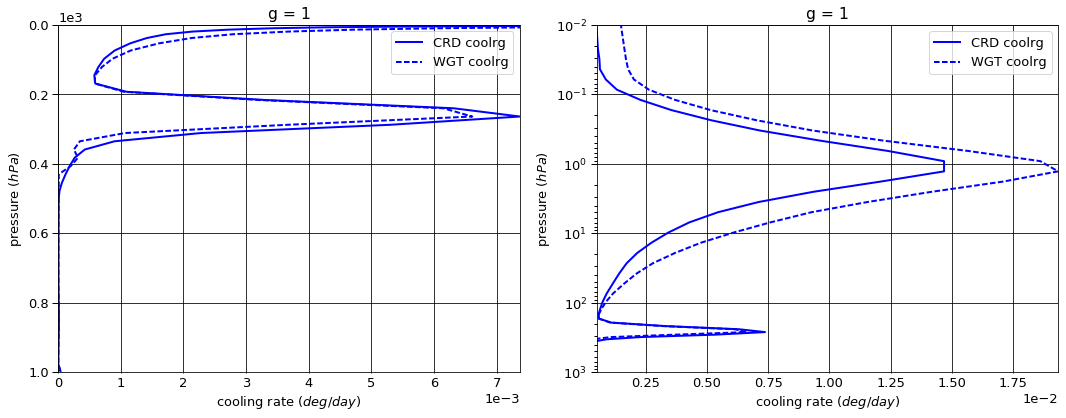

# Figure: cooling rate g-group 2

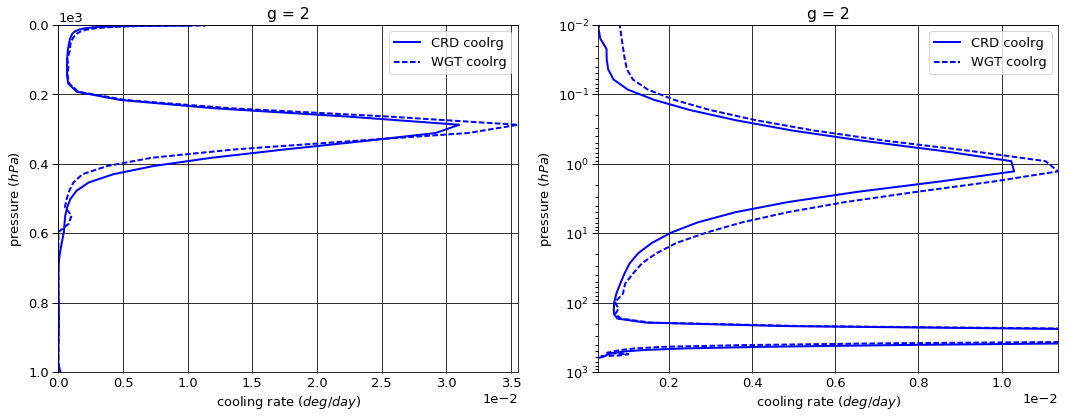

# Figure: cooling rate g-group 3

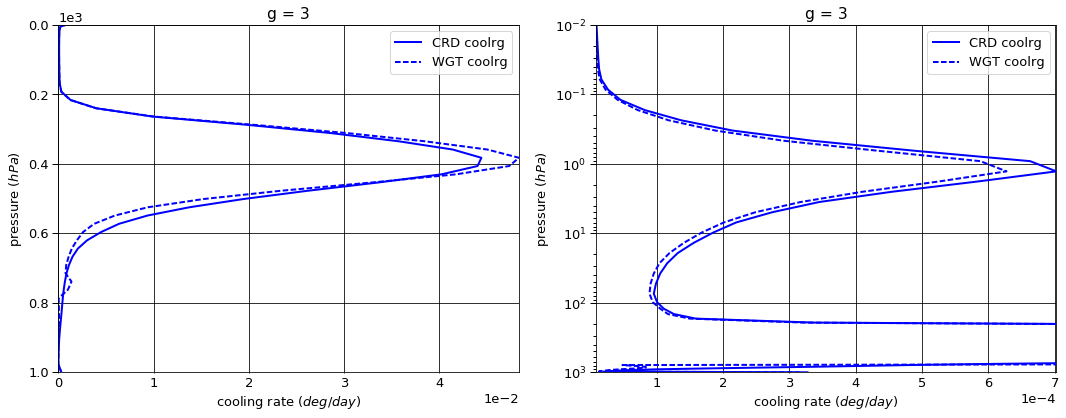

# Figure: cooling rate g-group 4

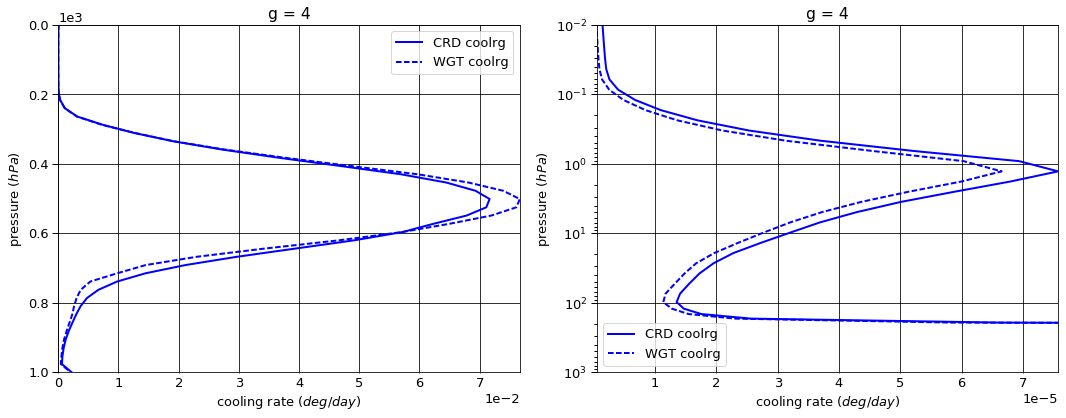

# Figure: cooling rate g-group 5

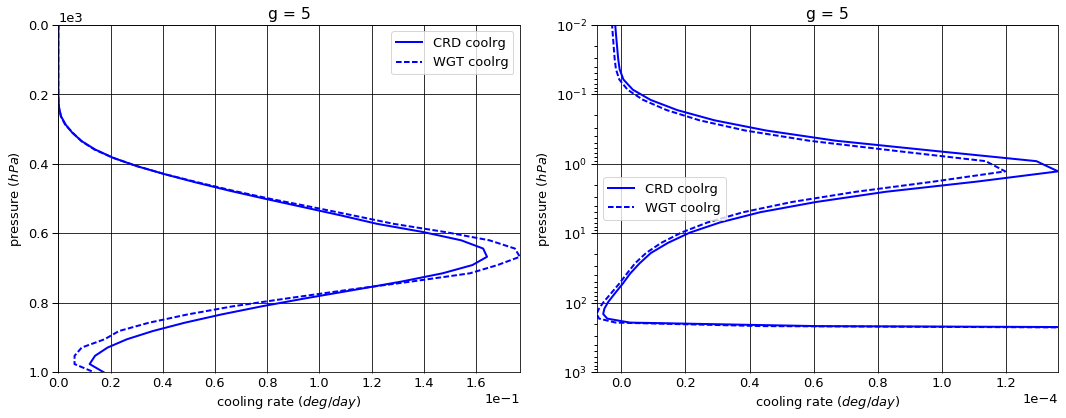

# Figure: cooling rate g-group 6

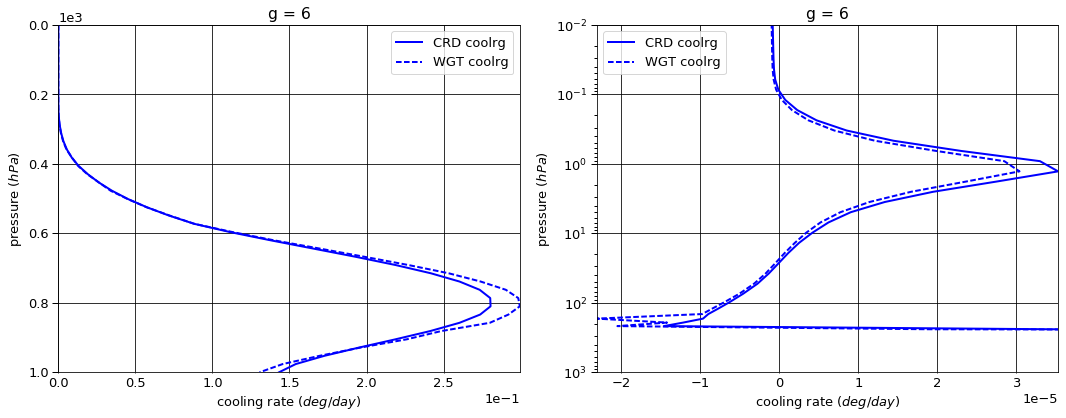

# Figure: cooling rate g-group 7

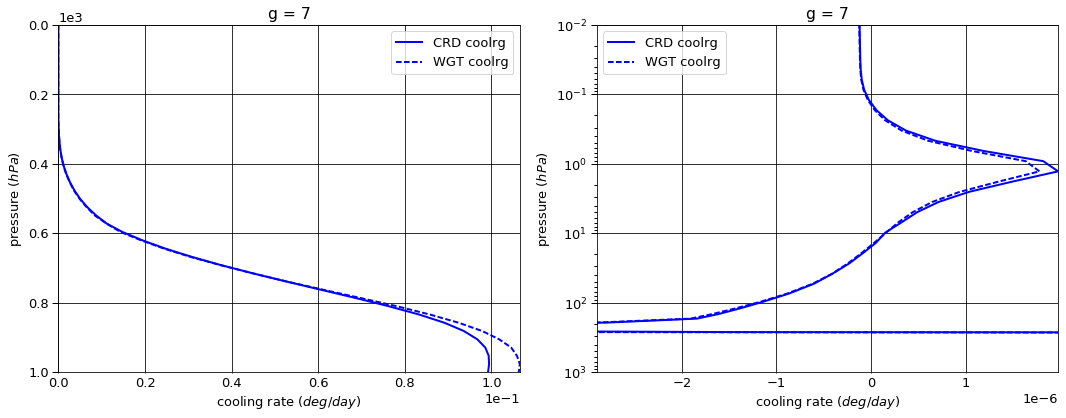

# Figure: cooling rate g-group total

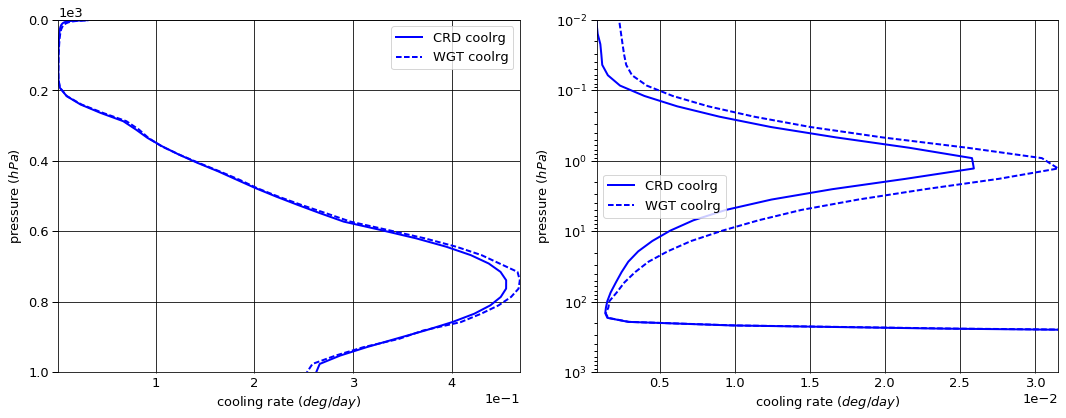

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.105958   0.000000  -0.105958
  1013.0   76     -0.244822   0.244711  -0.000111
2 0.0      1      -0.509708   0.000000  -0.509708
  1013.0   76     -1.035224   1.034753  -0.000471
3 0.0      1      -1.115506   0.000000  -1.115506
  1013.0   76     -1.920892   1.919995  -0.000897
4 0.0      1      -2.448116   0.000000  -2.448116
  1013.0   76     -3.608134   3.602368  -0.005766
5 0.0      1      -6.341205   0.000000  -6.341205
  1013.0   76     -8.145791   8.080567  -0.065224
6 0.0      1     -13.122344   0.000000 -13.122344
  1013.0   76    -15.079580  13.781216  -1.298364
7 0.0      1      -5.813407   0.000000  -5.813407
  1013.0   76     -6.200966   3.859425  -2.341541


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.104086   0.000000  -0.104086
  1013.0   76     -0.244822   0.244711  -0.000111
2 0.0      1      -0.497239   0.000000  -0.497239
  1013.0   76     -1.035224   1.034753  -0.000471
3 0.0      1      -1.100902   0.000000  -1.100902
  1013.0   76     -1.920892   1.920018  -0.000874
4 0.0      1      -2.426601   0.000000  -2.426601
  1013.0   76     -3.608134   3.602862  -0.005272
5 0.0      1      -6.292248   0.000000  -6.292248
  1013.0   76     -8.145791   8.102286  -0.043505
6 0.0      1     -13.065058   0.000000 -13.065058
  1013.0   76    -15.079580  14.201483  -0.878097
7 0.0      1      -5.808318   0.000000  -5.808318
  1013.0   76     -6.200966   3.985410  -2.215556


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.001872  0.000000  0.001872
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.012469  0.000000  0.012469
  1013.0   76     0.000000  0.000000  0.000000
3 0.0      1      0.014604  0.000000  0.014604
  1013.0   76     0.000000  0.000023  0.000023
4 0.0      1      0.021515  0.000000  0.021515
  1013.0   76     0.000000  0.000495  0.000495
5 0.0      1      0.048957  0.000000  0.048957
  1013.0   76     0.000000  0.021719  0.021719
6 0.0      1      0.057286  0.000000  0.057286
  1013.0   76     0.000000  0.420267  0.420267
7 0.0      1      0.005089  0.000000  0.005089
  1013.0   76     0.000000  0.125985  0.125985

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      6.843116e-05
  1001.112500 75     4.001960e-05
2 0.000312    1      1.360172e-04
  1001.112500 75     1.698710e-04
3 0.000312    1      4.593553e-06
  1001.112500 75     3.274128e-04
4 0.000312    1      6.414094e-07
  1001.112500 75     2.227960e-03
5 0.000312    1     -3.749329e-06
  1001.112500 75     1.741432e-02
6 0.000312    1     -1.010486e-06
  1001.112500 75     1.431960e-01
7 0.000312    1     -1.366287e-07
  1001.112500 75     9.922235e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.059711e-03
  1001.112500 75     4.001960e-05
2 0.000312    1      5.638619e-04
  1001.112500 75     1.698710e-04
3 0.000312    1      3.820646e-06
  1001.112500 75     3.152178e-04
4 0.000312    1     -1.849375e-07
  1001.112500 75     2.050738e-03
5 0.000312    1     -4.491865e-06
  1001.112500 75     1.373251e-02
6 0.000312    1     -1.100763e-06
  1001.112500 75     1.305685e-01
7 0.000312    1     -1.385380e-07
  1001.112500 75     1.063140e-01


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      9.912802e-04
  1001.112500 75     0.000000e+00
2 0.000312    1      4.278447e-04
  1001.112500 75     0.000000e+00
3 0.000312    1     -7.729077e-07
  1001.112500 75    -1.219496e-05
4 0.000312    1     -8.263470e-07
  1001.112500 75    -1.772227e-04
5 0.000312    1     -7.425361e-07
  1001.112500 75    -3.681815e-03
6 0.000312    1     -9.027720e-08
  1001.112500 75    -1.262749e-02
7 0.000312    1     -1.909300e-09
  1001.112500 75     7.091596e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.456244,0.000000,-29.456244
1013.0,76,-36.235408,32.523034,-3.712375



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.294451,0.000000,-29.294451
1013.0,76,-36.235408,33.091523,-3.143885



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.161793,0.000000,0.161793
1013.0,76,0.000000,0.568489,0.568489


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000205
1001.112500,75,0.262598



WGT


,,coolrg
pressure,layer,
0.000312,1,0.001621
1001.112500,75,0.253191



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.001417
1001.112500,75,-0.009407


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.006750,0.006798
2,0.028563,0.028687
3,0.053000,0.053233
4,0.099562,0.100153
5,0.224750,0.225604
6,0.416125,0.416491
7,0.171250,0.169035


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,7.643251e-21
2,1.773812e-21
3,4.116584e-22
4,9.553585e-23
5,2.217154e-23
6,5.145472e-24
7,1.194138e-24


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [7]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,7.643251e-21,NaN,0.006750,0.006798,0.006750,0.006798,600.0
2,1.773812e-21,0.232076,0.028563,0.028687,0.035313,0.035485,600.0
3,4.116584e-22,0.232076,0.053000,0.053233,0.088313,0.088718,600.0
4,9.553585e-23,0.232076,0.099562,0.100153,0.187875,0.188871,600.0
5,2.217154e-23,0.232076,0.224750,0.225604,0.412625,0.414475,600.0
6,5.145472e-24,0.232076,0.416125,0.416491,0.828750,0.830965,600.0
7,1.194138e-24,0.232076,0.171250,0.169035,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  1.110165e-20  5.418171e-22  20.489664
      2     0.000312  1.663596e-21  3.544784e-23  46.930804
      3     0.000312  1.292425e-23  1.316204e-24   9.819339
      4     0.000312  1.423965e-24  1.964193e-25   7.249615
      5     0.000312  2.093728e-24  1.233517e-25  16.973649
      6     0.000312  1.587512e-25  1.643775e-26   9.657720
      7     0.000312  3.481954e-26  4.174018e-27   8.341972
2     1     0.000750  1.115929e-20  5.424734e-22  20.571118
      2     0.000750  1.671709e-21  3.547986e-23  47.117123
      3     0.000750  1.307481e-23  1.320827e-24   9.898958
      4     0.000750  1.435581e-24  1.971851e-25   7.280372
      5     0.000750  2.104271e-24  1.237005e-25  17.011020
      6     0.000750  1.599841e-25  1.652078e-26   9.683810
      7     0.000750  3.496547e-26  4.191380e-27   8.342234
3     1     0.001052  1.128207e-20  5.436181e-22  20.753671
      2     0.001052  1.689072e-21  3.552168e-23  47.550457
      3     0.001052  1.339669e-23  1.328344e-24  10.085253
      4     0.001052  1.460113e-24  1.986342e-25   7.350764
      5     0.001052  2.126840e-24  1.244000e-25  17.096791
      6     0.001052  1.626242e-25  1.668593e-26   9.746189
      7     0.001052  3.527279e-26  4.226018e-27   8.346577
4     1     0.001476  1.141314e-20  5.448700e-22  20.946529
      2     0.001476  1.707594e-21  3.557024e-23  48.006262
      3     0.001476  1.374539e-23  1.336677e-24  10.283255
      4     0.001476  1.486509e-24  2.002087e-25   7.424799
      5     0.001476  2.150994e-24  1.251549e-25  17.186659
      6     0.001476  1.654691e-25  1.686305e-26   9.812526
      7     0.001476  3.560253e-26  4.263974e-27   8.349613
5     1     0.002070  1.154546e-20  5.461868e-22  21.138299
      2     0.002070  1.726274e-21  3.562606e-23  48.455392
      3     0.002070  1.410304e-23  1.345649e-24  10.480475
      4     0.002070  1.513412e-24  2.018462e-25   7.497846
      5     0.002070  2.175442e-24  1.259304e-25  17.274955
      6     0.002070  1.683699e-25  1.704389e-26   9.878608
      7     0.002070  3.593772e-26  4.303608e-27   8.350602
6     1     0.002904  1.167895e-20  5.475987e-22  21.327581
      2     0.002904  1.745092e-21  3.569220e-23  48.892804
      3     0.002904  1.446976e-23  1.355519e-24  10.674700
      4     0.002904  1.540845e-24  2.035676e-25   7.569202
      5     0.002904  2.200165e-24  1.267317e-25  17.360811
      6     0.002904  1.713261e-25  1.722966e-26   9.943672
      7     0.002904  3.627870e-26  4.345242e-27   8.349062
7     1     0.004074  1.181367e-20  5.491495e-22  21.512659
      2     0.004074  1.764040e-21  3.577302e-23  49.312016
      3     0.004074  1.484617e-23  1.366662e-24  10.863087
      4     0.004074  1.568876e-24  2.054044e-25   7.637985
      5     0.004074  2.225164e-24  1.275668e-25  17.443124
      6     0.004074  1.743402e-25  1.742231e-26  10.006719
      7     0.004074  3.662636e-26  4.389364e-27   8.344342
8     1     0.005714  1.194965e-20  5.509005e-22  21.691123
      2     0.005714  1.783109e-21  3.587462e-23  49.703925
      3     0.005714  1.523305e-23  1.379596e-24  11.041676
      4     0.005714  1.597599e-24  2.074009e-25   7.702949
      5     0.005714  2.250441e-24  1.284473e-25  17.520351
      6     0.005714  1.774152e-25  1.762461e-26  10.066334
      7     0.005714  3.698188e-26  4.436652e-27   8.335537
9     1     0.008015  1.208701e-20  5.529380e-22  21.859623
      2     0.008015  1.802291e-21  3.600558e-23  50.055881
      3     0.008015  1.563152e-23  1.395043e-24  11.205047
      4     0.008015  1.627149e-24  2.096200e-25   7.762375
      5     0.008015  2.276003e-24  1.293894e-25  17.590337
      6     0.008015  1.805557e-25  1.784053e-26  10.120536
      7     0.008015  3.734697e-26  4.488061e-27   8.321404
10    1     0.011243  1.222585e-20  5.553824e-22  22.013395
      2     0.011243  1.821561e-21  3.617793e-23  50

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
